<a href="https://colab.research.google.com/github/christianvadillo/fakenewsdetection/blob/main/EDA_Pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explorando el dataset final v. 0.1

In [102]:
!pip install unidecode

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [144]:
# file= 'https://raw.githubusercontent.com/christianvadillo/fakenewsdetection/main/data/processed/covid_fakenews_es_utf.csv'
file= 'https://raw.githubusercontent.com/christianvadillo/fakenewsdetection/main/data/processed/covid_fakenews_es_utf_21_Oct_2020_17_29.csv'

df = pd.read_csv(file)
df.head()

,url,titulo,texto,categoria,fecha_aparicion,organizacion
0,https://www.newtral.es/bulos-coronavirus-pcr-k...,no title,"Estos vídeos de Kary Mullis, inventor del PCR,...",no confiable,2020-10-13 00:00:00+00:00,Newtral
1,https://colombiacheck.com/chequeos/no-ecuador-...,"No, Ecuador no encontró la cura para el COVID-...",Ecuador venció al coronavirus,no confiable,2020-10-08 18:36:17+00:00,ColombiaCheck
2,https://www.telemundo.com/noticias/noticias-te...,Las afirmaciones falsas y engañosas del debate...,"""Trump llamó al coronavirus un ""fraude"".",no confiable,2020-10-08 00:00:00+00:00,Telemundo
3,https://factual.afp.com/la-inscripcion-en-caja...,La inscripción en cajas de tapabocas no prueba...,La inscripción en las cajas de mascarillas pru...,no confiable,2020-10-07 18:36:00+00:00,AFP Factual
4,https://chequeado.com/ultimas-noticias/alesso-...,Alesso (CTERA): “En los lugares donde hay poco...,En los lugares donde hay pocos casos de corona...,no confiable,2020-10-07 00:00:00+00:00,Chequeado


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7482 entries, 0 to 7481
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   url              7482 non-null   object
 1   titulo           7482 non-null   object
 2   texto            7482 non-null   object
 3   categoria        7482 non-null   object
 4   fecha_aparicion  7478 non-null   object
 5   organizacion     7482 non-null   object
dtypes: object(6)
memory usage: 350.8+ KB


## Conteo de categorías

Text(0.5, 1.0, 'Conteo por categoría')

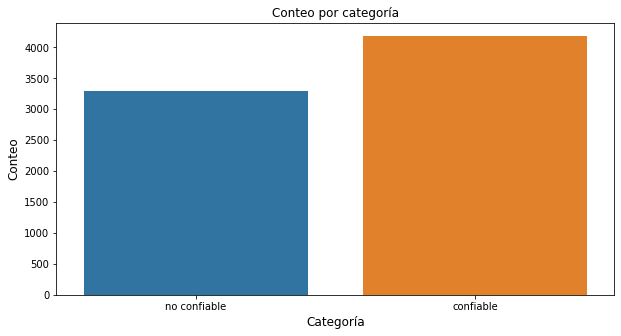

In [146]:
plt.figure(figsize=(10, 5))
sns.countplot(df['categoria']);
plt.ylabel('Conteo', fontsize=12);
plt.xlabel('Categoría', fontsize=12);
plt.title('Conteo por categoría')

## Conteo de caracteres

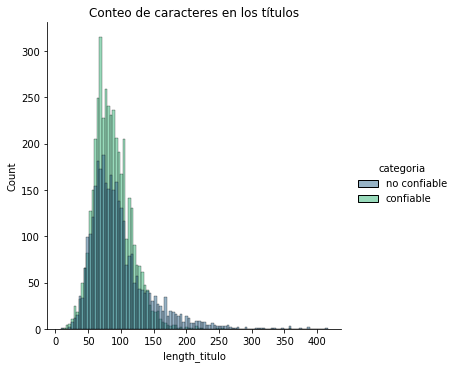

In [147]:
df['length_titulo'] = df['titulo'].apply(len)
sns.displot(data=df, x='length_titulo', hue='categoria', palette='viridis')
plt.title('Conteo de caracteres en los títulos');

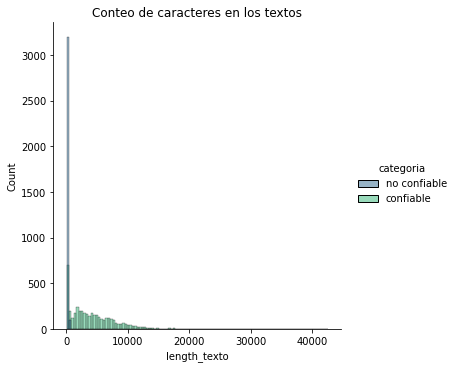

In [148]:
df['length_texto'] = df['texto'].apply(len)
sns.displot(data=df, x='length_texto', hue='categoria', palette='viridis')
plt.title('Conteo de caracteres en los textos');

## Conteo de palabras


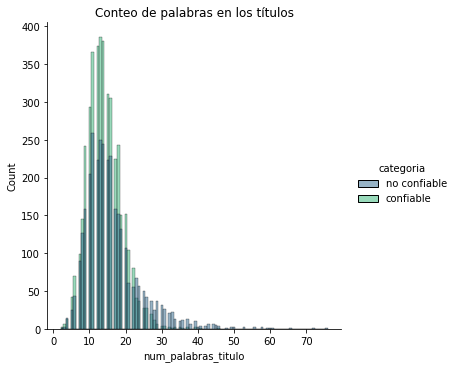

In [149]:
df['num_palabras_titulo'] = df['titulo'].apply(lambda x: len(x.split()))

sns.displot(data=df, x='num_palabras_titulo', hue='categoria', palette='viridis')
plt.title('Conteo de palabras en los títulos');

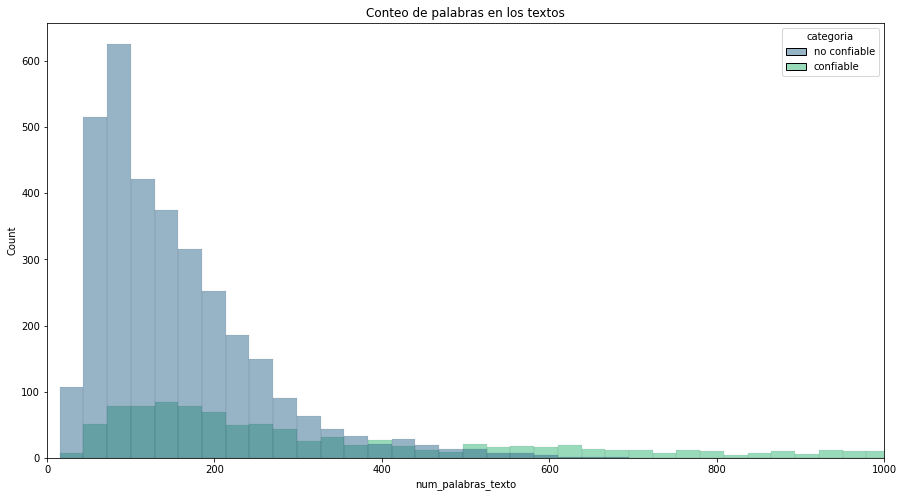

In [150]:
df['num_palabras_texto'] = df['texto'].apply(len)

sns.histplot(data=df, bins=1500, x='num_palabras_texto', hue='categoria', palette='viridis')
plt.title('Conteo de palabras en los textos');
plt.xlim(0,1000);

## Noticias a través del tiempo

In [151]:
df['fecha_aparicion'] = pd.to_datetime(df['fecha_aparicion'], utc=True)

In [152]:
# Ordenando las fechas
df.sort_values(by='fecha_aparicion', inplace=True, ignore_index=True)

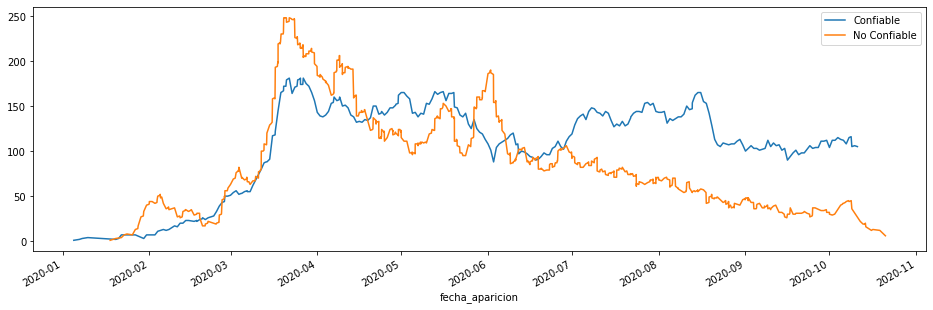

In [153]:
conf = df.query("categoria == 'confiable'")
no_conf = df.query("categoria == 'no confiable'")

conf.groupby(['fecha_aparicion']).count()['categoria'].rolling('7d').sum().plot(figsize=(16,5), label='Confiable')
no_conf.groupby(['fecha_aparicion']).count()['categoria'].rolling('7d').sum().plot(figsize=(16,5), label = 'No Confiable')
plt.legend()

## Palabras y stopwords más frecuentes

In [154]:
import nltk
import numpy as np 
import re
import unicodedata
import itertools

from unidecode import unidecode
from collections import defaultdict, Counter
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')


stop_words_es = stopwords.words('spanish')  # stopwords in spanish

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [165]:
stop_words_es = stop_words_es + ['cnn', 'mas', 'si']

In [156]:
# Crear vocabulario

def create_vocab(docs, rm_sw=False, rm_symb=False):
  vocab = []
  rm_stopwords = []
  for doc in docs:
    # To lowercase
    doc = doc.lower()

    if rm_symb:
      # Remove accents
      doc = unicodedata.normalize(u'NFKD', doc)\
                       .encode('ascii', 'ignore')\
                       .decode('utf8')
      # Remove numbers and punctuations
      doc = re.sub(r'[^a-zA-Z\s]', '', doc)

    # Split the text
    tokens = nltk.word_tokenize(doc)
    
    if rm_sw: 
      # To keep the track of the removed stopwords
      [rm_stopwords.append(token) for token in tokens if token in stop_words_es]
      # Remove the stopwords
      tokens = [token for token in tokens if token not in stop_words_es]
      
    vocab.append(tokens)
  # To flatt the list
  vocab = list(itertools.chain.from_iterable(vocab))
  return vocab, rm_stopwords

vocab, rm_stopwords = create_vocab(df['titulo'], rm_sw=True, rm_symb=True)
count_vocab = Counter(vocab)
count_sw = Counter(rm_stopwords)


In [167]:
count_vocab.most_common(100)

[('coronavirus', 2763),
 ('covid', 1922),
 ('pandemia', 526),
 ('trump', 394),
 ('nuevo', 372),
 ('video', 362),
 ('vacuna', 351),
 ('casos', 311),
 ('eeuu', 292),
 ('dice', 271),
 ('gobierno', 228),
 ('personas', 227),
 ('salud', 217),
 ('china', 214),
 ('cuarentena', 210),
 ('unidos', 197),
 ('puede', 178),
 ('muertes', 173),
 ('presidente', 169),
 ('oms', 168),
 ('mundo', 164),
 ('brasil', 156),
 ('estan', 152),
 ('cura', 151),
 ('segun', 151),
 ('imagen', 149),
 ('pruebas', 146),
 ('pacientes', 145),
 ('hospital', 144),
 ('ser', 143),
 ('virus', 141),
 ('millones', 141),
 ('muestra', 139),
 ('argentina', 132),
 ('mexico', 131),
 ('espana', 130),
 ('casa', 129),
 ('pais', 128),
 ('sabemos', 126),
 ('podria', 124),
 ('dijo', 121),
 ('colombia', 113),
 ('medio', 112),
 ('medicos', 111),
 ('positivo', 110),
 ('nueva', 108),
 ('crisis', 108),
 ('uso', 108),
 ('dos', 101),
 ('mascarillas', 101),
 ('tras', 99),
 ('asegura', 98),
 ('dias', 94),
 ('mundial', 93),
 ('italia', 91),
 ('agua', 

In [158]:
count_sw.most_common(20)

[('de', 8392),
 ('el', 4536),
 ('la', 4444),
 ('en', 3677),
 ('que', 3274),
 ('a', 1850),
 ('y', 1757),
 ('por', 1690),
 ('un', 1637),
 ('no', 1484),
 ('los', 1445),
 ('del', 1419),
 ('una', 1243),
 ('para', 1238),
 ('las', 1137),
 ('con', 991),
 ('se', 961),
 ('es', 910),
 ('sobre', 535),
 ('mas', 508)]

# Text Pre-processing

# Normalizando los textos

In [159]:
def normalize_document(doc, rm_sw=False, rm_symb=False):
    '''
    Cleans text including removal of whitespace, punctuation, accented characters,
    special characters and transforming to lowercase. Assumes input text is string.
    Returns clean string.
    '''
    # lower case and remove special characters\whitespaces
    if rm_symb:
      # Remove accents
      doc = unicodedata.normalize(u'NFKD', doc)\
                       .encode('ascii', 'ignore')\
                       .decode('utf8')
      # Remove numbers and punctuations
      doc = re.sub(r'[^a-zA-Z\s]', '', doc)
    # To lowercase
    doc = doc.lower()
    # Remove extra space
    doc = doc.strip()

    if rm_sw:
      # tokenize document
      tokens = nltk.word_tokenize(doc)
      # filter stopwords out of document
      filtered_tokens = [token for token in tokens if token not in stop_words_es]
      # re-create document from filtered tokens
      doc = ' '.join(filtered_tokens)
      return doc

    return doc

normalize_corpus = np.vectorize(normalize_document)

In [160]:
no_conf_corpus = normalize_corpus(df[df['categoria'] == 'no confiable']['texto'],
                                  rm_symb=True, rm_sw=True)
conf_corpus = normalize_corpus(df[df['categoria'] == 'confiable']['texto'],
                                  rm_symb=True, rm_sw=True)
norm_corpus = normalize_corpus(df['titulo'], rm_symb=True, rm_sw=True)

In [161]:
from wordcloud import WordCloud

stop_words_es = stop_words_es + ['dice', 'si' 'estan', 'asi', ]

def plot_wordcloud(corpus, title=''):
  wordcloud = WordCloud(stopwords = stop_words_es).generate(" ".join(corpus))
  plt.rcParams['figure.figsize'] = (15, 8)
  plt.imshow(wordcloud)
  plt.title(f'Most Common Words - {title}', fontsize = 30)
  plt.axis('off')
  plt.show()


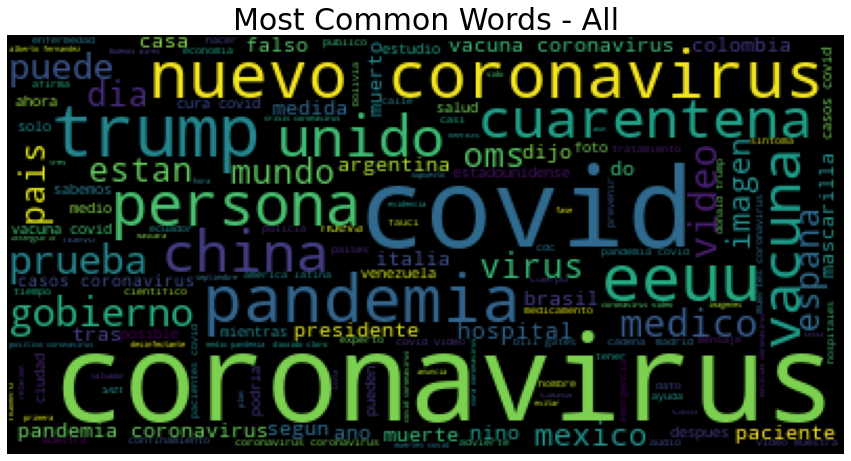

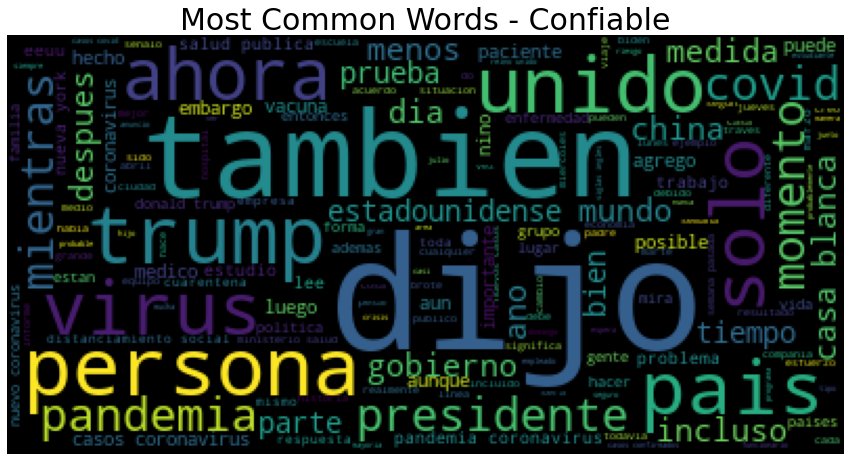

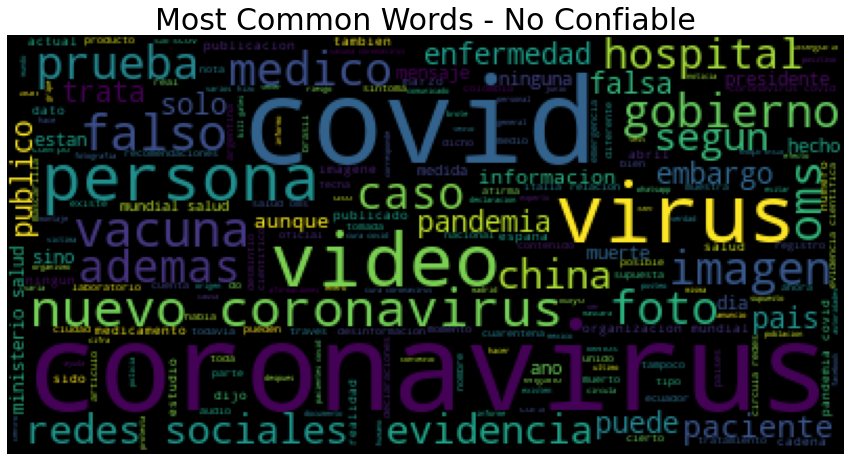

In [162]:
plot_wordcloud(norm_corpus, 'All')
plot_wordcloud(conf_corpus, 'Confiable')
plot_wordcloud(no_conf_corpus, 'No Confiable')


In [163]:
df[df['titulo'].apply(lambda x: 'bill' in x.lower())]['titulo']

33      Bill Gates es el propietario de la patente del...
56      No hay patente del nuevo coronavirus y Bill Ga...
57            Bill Gates predijo el brote de coronavirus 
63      No hay pruebas de que Bill Gates sea el propie...
66      La fundación de Bill Gates participó en un sim...
                              ...                        
7114    el racismo le ha costado a ee.uu. us$ 16 billo...
7161    No, Bill Gates no ha confirmado que van a "imp...
7166    Una imagen supuestamente de la web de diario E...
7448    bill gates elogia tratamiento de regeneron que...
7450    trump firma contraoferta de estímulo económico...
Name: titulo, Length: 92, dtype: object